# Alzheimer Classification

## Imports & Set Variables

### Import Libraries

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
tf.version

<module 'tensorflow._api.v2.version' from '/Users/gvitale/Library/Python/3.9/lib/python/site-packages/tensorflow/_api/v2/version/__init__.py'>

### Unzip Data

In [25]:
PATH = 'AlzheimersData'

modelCheckpoints_dir = os.path.join(PATH, "ModelCheckpoints")
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')
val_dir = os.path.join(PATH, 'validation')

### Set Variables

In [4]:
BATCH_SIZE = 128
EPOCHS = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
TOTAL_TRAIN_DATA = sum([len(files) for r, d, files in os.walk(train_dir)])
TOTAL_VAL_DATA = sum([len(files) for r, d, files in os.walk(val_dir)])
TOTAL_TEST_DATA = sum([len(files) for r, d, files in os.walk(test_dir)])

## Build and Train Model

### Create Image Scanners and Batchers

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./300)
val_image_generator = ImageDataGenerator(rescale=1./300)
test_image_generator = ImageDataGenerator(rescale=1./300)


train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           batch_size = BATCH_SIZE,
                                                           target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode = 'categorical')
val_data_gen = val_image_generator.flow_from_directory(val_dir,
                                                       batch_size = BATCH_SIZE,
                                                       target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                       class_mode = 'categorical')
test_data_gen = test_image_generator.flow_from_directory(test_dir,
                                                         batch_size = BATCH_SIZE,
                                                         target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode = None,
                                                         shuffle = False)

'''for data_batch, labels_batch in train_data_gen:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break'''

for data_batch in test_data_gen:
    print('Data batch shape:', data_batch.shape)
    break

Found 27188 images belonging to 4 classes.
Found 6796 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.
Data batch shape: (128, 150, 150, 3)


### Display Images

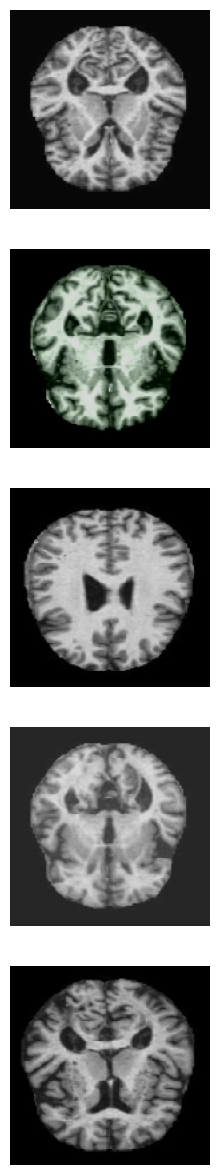

In [17]:
def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    for img, ax in zip( images_arr, axes):
      ax.imshow(img)
      ax.axis('off')

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

## Build and Train Model

### Build Model

In [ ]:
model = keras.Sequential()
model.add(layers.Input((150, 150, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

for data_batch, labels_batch in train_data_gen:
    print('Data batch shape:', data_batch.shape)
    print('Labels batch shape:', labels_batch.shape)
    break

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,813,508 (25.99 MB)

 Trainable params: 6,813,508 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

Data batch shape: (128, 150, 150, 3)
Labels batch shape: (128, 4)


### Train Model

In [15]:
# training model
history = model.fit(train_data_gen, epochs=EPOCHS, steps_per_epoch=TOTAL_TRAIN_DATA//BATCH_SIZE, validation_data=val_data_gen, validation_steps=TOTAL_VAL_DATA//BATCH_SIZE)

Epoch 1/15


/Users/gvitale/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


212/212 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.3902 - loss: 1.2502 - val_accuracy: 0.6798 - val_loss: 0.7180
Epoch 2/15
  1/212 ━━━━━━━━━━━━━━━━━━━━ 22:29:01 384s/step - accuracy: 0.6562 - loss: 0.8415

2024-04-19 19:49:35.533084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2024-04-19 19:49:35.740579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 384s 1ms/step - accuracy: 0.6562 - loss: 0.8415 - val_accuracy: 0.9167 - val_loss: 0.7011
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 527s 2s/step - accuracy: 0.7020 - loss: 0.6549 - val_accuracy: 0.7423 - val_loss: 0.5714
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 620us/step - accuracy: 0.6875 - loss: 0.5709 - val_accuracy: 0.5000 - val_loss: 0.6479
Epoch 5/15


2024-04-19 19:58:25.400643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 19:58:25.498269: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 1448s 7s/step - accuracy: 0.7925 - loss: 0.4860 - val_accuracy: 0.8037 - val_loss: 0.4666
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 846us/step - accuracy: 0.8516 - loss: 0.3901 - val_accuracy: 0.8333 - val_loss: 0.3967
Epoch 7/15


2024-04-19 20:22:36.015764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 20:22:36.135826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 1548s 7s/step - accuracy: 0.8598 - loss: 0.3357 - val_accuracy: 0.8684 - val_loss: 0.3272
Epoch 8/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step - accuracy: 0.8125 - loss: 0.3885 - val_accuracy: 0.9167 - val_loss: 0.1571
Epoch 9/15


2024-04-19 20:48:25.817997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 20:48:25.905671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.9095 - loss: 0.2297 - val_accuracy: 0.8812 - val_loss: 0.3030
Epoch 10/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - accuracy: 0.9297 - loss: 0.2248 - val_accuracy: 0.8333 - val_loss: 0.3330
Epoch 11/15


2024-04-19 20:56:24.303428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 20:56:24.380922: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 495s 2s/step - accuracy: 0.9374 - loss: 0.1612 - val_accuracy: 0.9111 - val_loss: 0.2410
Epoch 12/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9375 - loss: 0.1838 - val_accuracy: 0.8333 - val_loss: 0.2943
Epoch 13/15


2024-04-19 21:04:42.401339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 21:04:42.537429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 466s 2s/step - accuracy: 0.9646 - loss: 0.0961 - val_accuracy: 0.9179 - val_loss: 0.2332
Epoch 14/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 949us/step - accuracy: 0.9453 - loss: 0.1380 - val_accuracy: 0.9167 - val_loss: 0.4590
Epoch 15/15


2024-04-19 21:12:30.770525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-19 21:12:30.924460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


212/212 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.9698 - loss: 0.0835 - val_accuracy: 0.9222 - val_loss: 0.2424


### Load Saved Model

In [7]:
model = tf.keras.models.load_model(os.path.join(PATH, 'ModelCheckpoints', 'model.keras'))

### Plot Model Performance

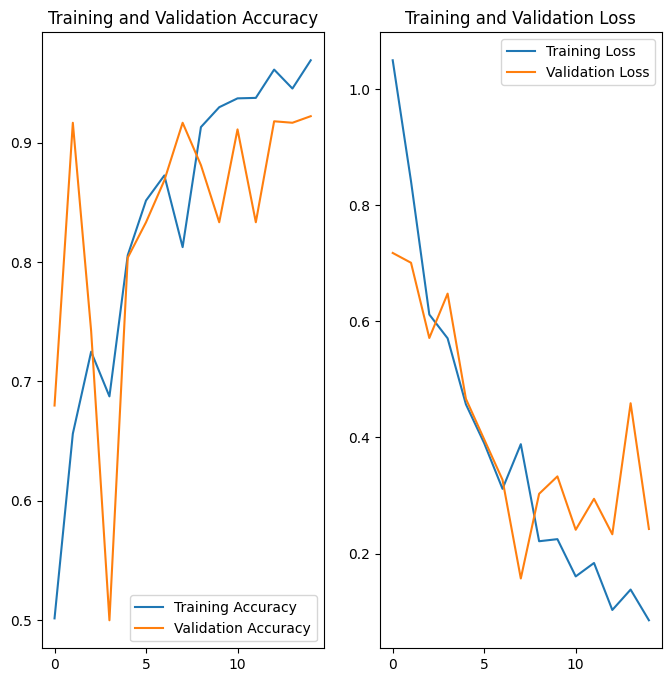

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Look at Predictions

In [46]:
predictions = model.predict(test_data_gen, steps=len(test_data_gen), verbose=1)
print(predictions[:5])

/Users/gvitale/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 625ms/step
[[9.9999887e-01 5.4292493e-32 1.4918332e-12 1.0396508e-06]
 [9.9999994e-01 1.9027927e-36 5.9009540e-11 2.2873548e-08]
 [9.9999994e-01 8.2222262e-32 2.8358132e-13 1.5867876e-08]
 [9.9923646e-01 9.2815421e-35 7.5649558e-07 7.6282863e-04]
 [9.9995774e-01 2.7865965e-17 1.9862011e-11 4.2190120e-05]]


## Testing Model

### Prediction Functions

In [43]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)
    return img
def getPrediction(preds):
    pred_key = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
    prediction = np.argmax(preds)
    return pred_key[prediction]
def predict(img_path):
    input_image = preprocess_image(img_path)
    pred = model.predict(input_image)
    prediction = getPrediction(pred)

    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Prediction: ' + prediction)
    plt.axis('off')
    plt.show()

    print(f'Actual: {os.path.abspath(img_path).split("/")[-2]}')

    return prediction

### Predict Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


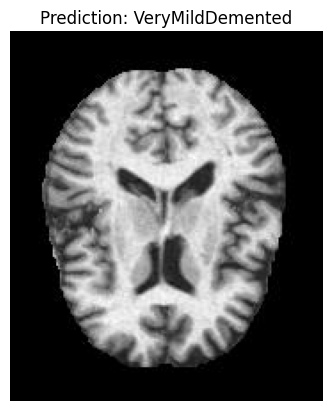

Actual: VeryMildDemented
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


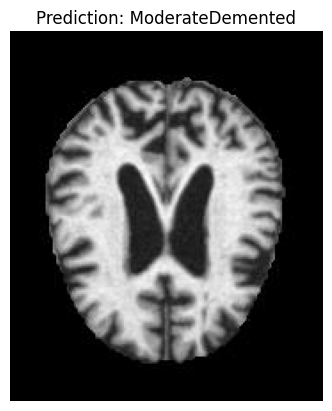

Actual: ModerateDemented
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


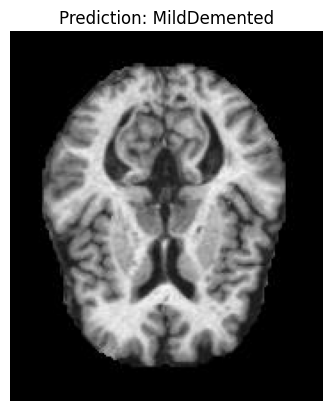

Actual: MildDemented
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


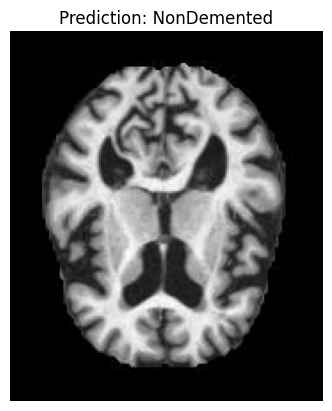

Actual: NonDemented


In [45]:
directories = os.listdir('AlzheimersData/test')[1:]
for i in range(len(directories)):
    directories[i] = os.path.join('AlzheimersData/test', directories[i])
for directory in directories:
    img_path = os.path.join(directory, random.choice(os.listdir(directory)))
    predict(img_path)

## Save Model Weights

In [72]:
model.save('model.keras')

None
